# Customer Churn Prediction
Customer Churn Prediction involves predicting if and when a customer will stop using the provided service. This is done based on several variables related to the customer that helps understand their behavior. This can help the business identify the customers who might churn and carry out actions accordingly to try and retain them and reduces their chances of churn. Early churn prediction is a very important concept used in several industries including the Telco industry. In this research, we use customer data from the Telco industry to understand their behavior and predict churn.
<br>
Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

## Problem Statement
Customer churn is a problem for a telecom company and they want to reduce this. They have data collected about their customers which provides an idea about the customer's usage of the service upto now. They want a method to proactively identify customers who are at a high risk of leaving. Based on this they can run targeted strategies which can help them reduce their risk of leaving the service. The goal of this risk to build models with optimal accuracy in predicting whether a customer will churn or not along with the probability of such a thing happening.

## Dataset Explanation
<TODO>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style="whitegrid")

## Data Exploration

In [2]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/CustomerChurn/TelcoChurnDataset.csv')

In [3]:
# Display the first 5 records in the dataset
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
# Get an overview of the attributes in the dataset
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Target Variable: Churn<br>
Demographics: gender, SeniorCitizen, Partner, Dependents<br>
Service Info: PhoneService, MultipleLines, InternetService, OnlineSecurity, etc.<br>
Account Info: tenure, Contract, MonthlyCharges, TotalCharges, PaymentMethod

We will have to perform some data cleanup before we carry out some of the EDA steps needed to explore and understand the data.

In [6]:
# Convert TotalCharges to numeric (coerce errors to NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [7]:
# Drop customerID as it’s not useful
df.drop("customerID", axis=1, inplace=True)

In [8]:
# Check for missing values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


There are 7043 rows in the dataset out of which there are 11 rows where TotalCharges is empty. As this is only 0.001% of the entire dataset, these rows can be safely dropped from the dataset.

In [9]:
df.dropna(inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

We can label encode the target variable. Since this is binary - Yes or No, these are mapped as follows: <br>
* Yes : 1
* No : 0

In [11]:
df["Churn"] = df["Churn"].map({'Yes': 1, 'No': 0})

### Churn Distribution
The following graph shows how the data is distributed between the two classes. As you can observe there are more users who have not churn/will not churn compared to the number of users who churn.

<ipython-input-13-ede3b4445c31>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No Churn", "Churn"])


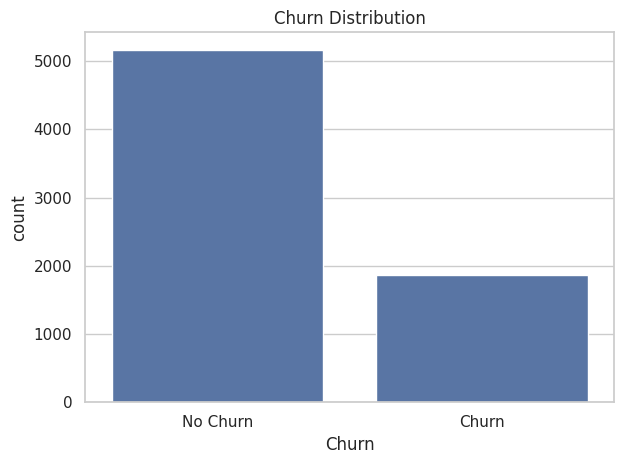

In [13]:
fig, ax = plt.subplots()
sns.countplot(data=df, x="Churn", ax=ax)
ax.set_title("Churn Distribution")
ax.set_xticklabels(["No Churn", "Churn"])
plt.tight_layout()
plt.show()

The dataset contains several categorical features. These can be compared to churn to see how the distribution of all these categorical features vary between Churn and No Churn.

In [14]:
# List of relevant categorical features (excluding target)
categorical_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
    "PaymentMethod"
]

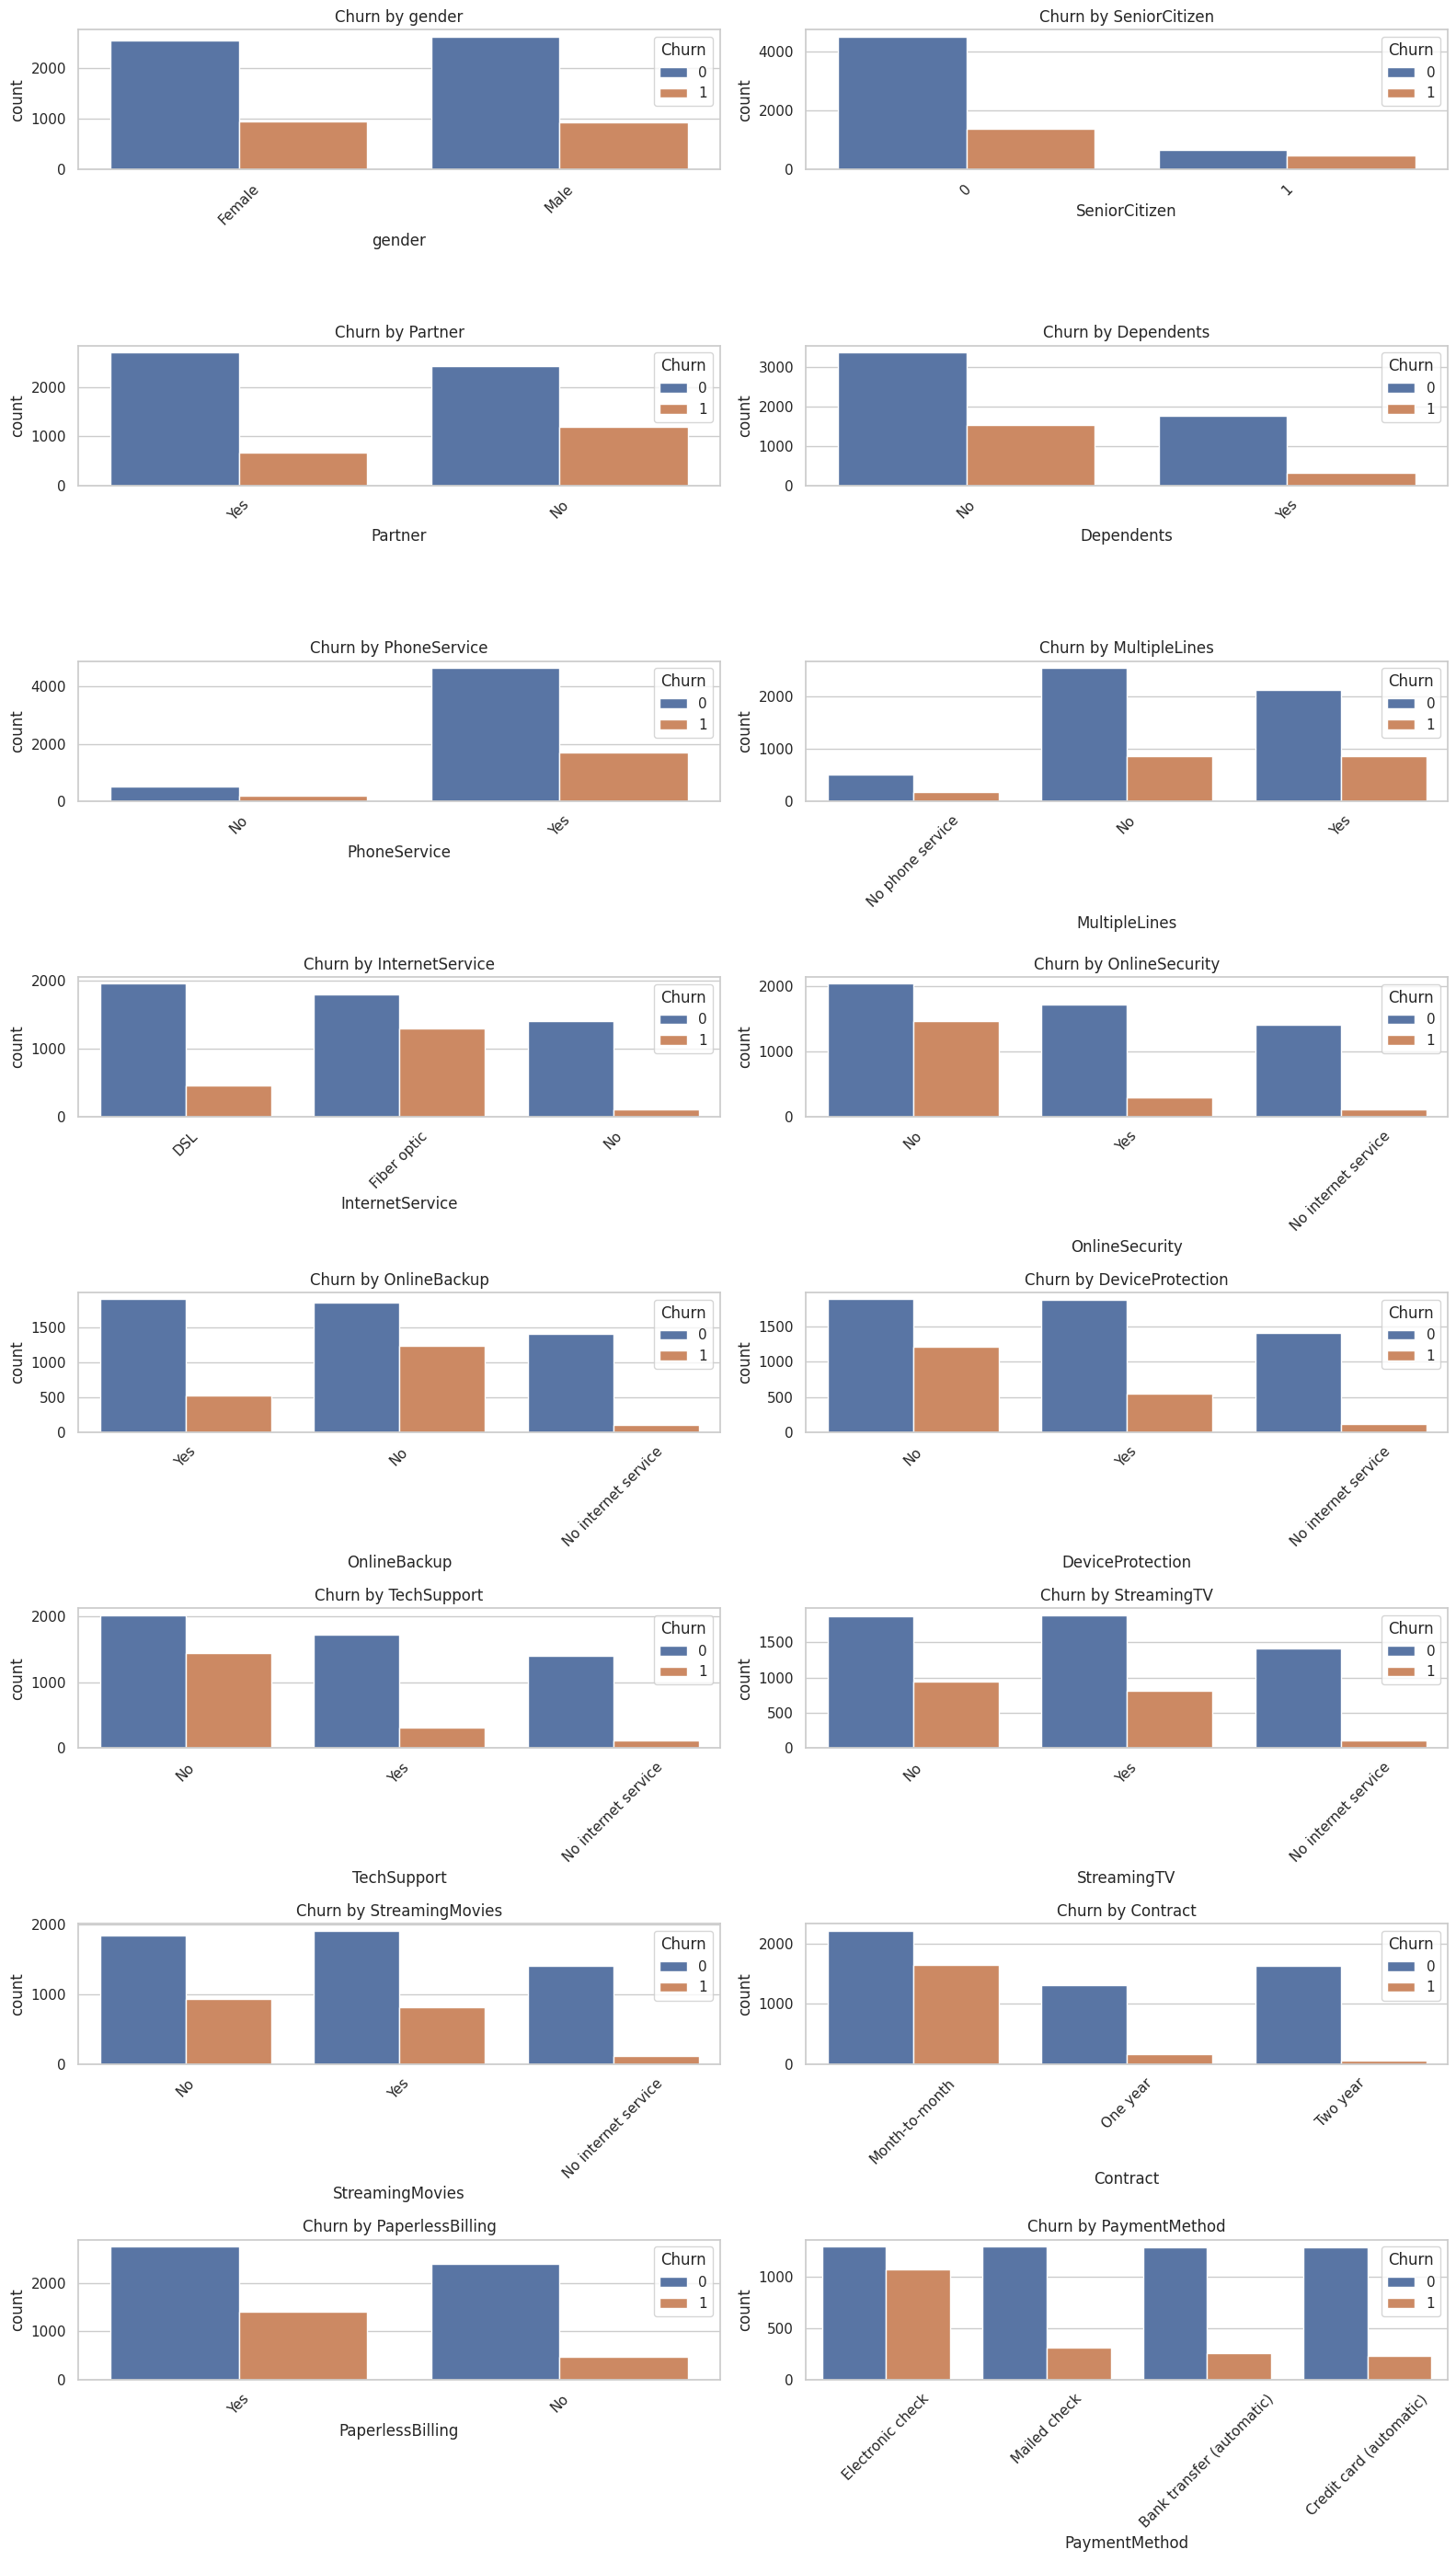

In [15]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(16, 28))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue="Churn", ax=axes[i])
    axes[i].set_title(f"Churn by {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Insights from the above plots**<br><br>
* Senior Citizens and customers with no partners or dependents are more likely to churn.
* Customers with Month-to-Month contracts churn far more than those on yearly plans.
* Electronic check payment users have significantly higher churn.
* Lack of services like OnlineSecurity, TechSupport, and DeviceProtection correlates with higher churn.

In [16]:
# Numerical features
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

<ipython-input-17-dd4e354517f2>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No", "Yes"])
<ipython-input-17-dd4e354517f2>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No", "Yes"])
<ipython-input-17-dd4e354517f2>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No", "Yes"])


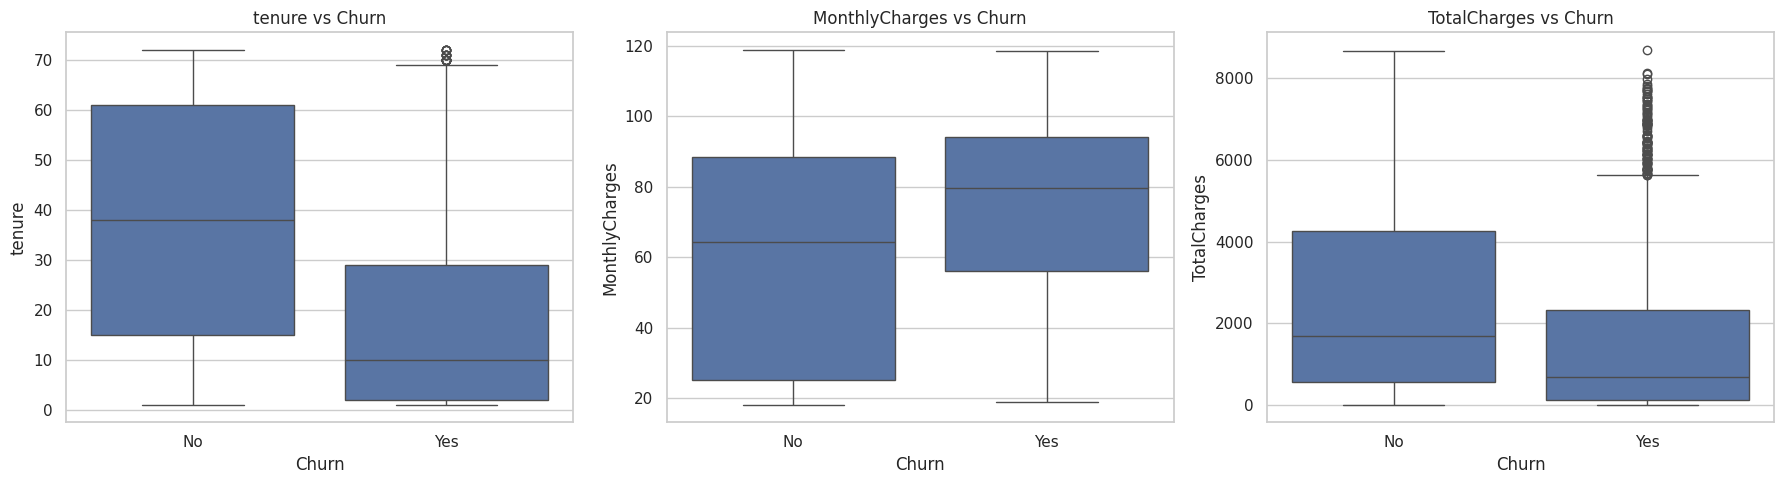

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x="Churn", y=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].set_xticklabels(["No", "Yes"])

plt.tight_layout()
plt.show()

From the above box plots, it can be easily understood that a large number of the users who churn are the ones with a short tenure. Further their monthly charges seem to be relatively high and this may indicate that they aren't using the right package that suits them and probably end up paying more than they should.

### Correlation Matrix
A correlation matrix between the numeric features in the dataset and the target variable, Churn.

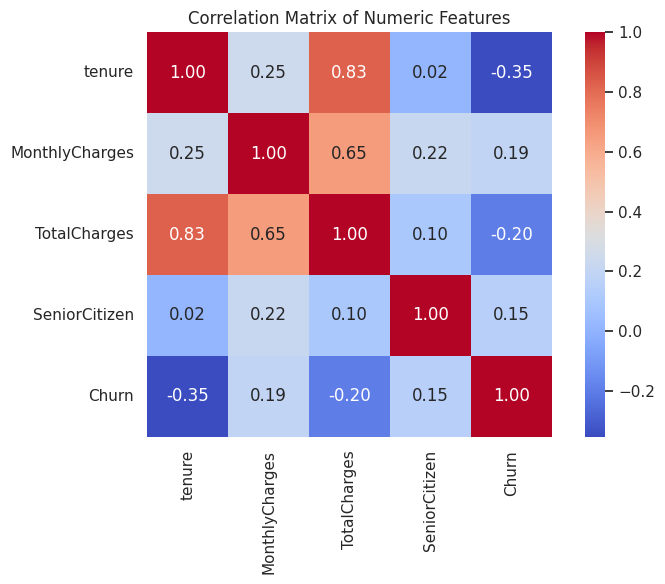

In [18]:
# Correlation matrix for numeric features
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen", "Churn"]
correlation_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

**Insights from the Correlation matrix**<br>

* Tenure and TotalCharges are highly positively correlated (0.83), which is expected.
* MonthlyCharges has moderate correlation with Churn (0.19).
* Tenure has a negative correlation with Churn (-0.35), indicating customers with longer tenure are less likely to churn.
* SeniorCitizen is weakly positively correlated with Churn (0.15).

These insights guide us on which features may be more important, but we keep them all initially and allow model training to assign importance.

## Preprocessing
One of the first steps to be carried out is to encode the features in the dataset as there are several categorical features in the dataset. These need to be encoded into numerical representation as the algorithms to be used will require these to be numerics instead of strings.<br>
The following types of encodings will be used as part of the process depending on the types of categories:<br>
* Label Encoding: Binary categories.
* One Hot Encoding: Multiple categories to avoid false ordinal assumptions.
<br>

In [12]:
# Binary columns
binary_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling"
]

# Multi Class Columns
multi_class_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaymentMethod"
]

In [13]:
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [14]:
df = pd.get_dummies(df, columns=multi_class_cols)

In [15]:
df.shape

(7032, 41)

As it can be observed from the above, there are now 41 features indicating that after carrying out one hot encoding, a lot of new features have been introduced into the dataset. This may or may not require some technique to reduce features as there are many features in the daaset now. Too many features might cause algorithms to perform poorly.

<br>

Next we want to use StandardScaler to scale the numeric columns. StandardScaler will scale the data around 0 with a deviation of 1 (-1 to +1 with 0 as the mean).

In [16]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [17]:
# We save the scaler and label encoder so that this can be reused later if required
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/CustomerChurn/scaler.pkl')
joblib.dump(le, '/content/drive/MyDrive/CustomerChurn/label_encoder.pkl')

['/content/drive/MyDrive/CustomerChurn/label_encoder.pkl']

### Model Building and Evaluation
As the first step we extract the features and the target variable and these are stored in separate variables so that K-Fold Cross Validation can be used.
#### K-Fold Cross Validation
This helps get a reliable performance of the model. In K-Fold CV, the dataset is split into K splits and 1 split is used for testing while the rest are used for training. This reduces variance caused by one bad split and is also the most suitable for hyperparameter tuning.<br>
In this case we have an imbalanced class and therefore we use a variation of K-Fold CV known as Stratified K-Fold CV. It ensures that each fold has the same class distribution as the full dataset. Maintains original distribution.

In [18]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
# Define the variables to store the performance metrics for all the 3 models that are trained
accuracies, f1s, precisions, recalls, cm = {}, {}, {}, {}, {}

#### Random Forest
We first build a Random Forest model without hyperparameter tuning and then apply hyperparameter tuning to understand how they improve with tuning.

[RandomForest] Average Accuracy: 0.7900
[RandomForest] Average Precision: 0.6350
[RandomForest] Average Recall: 0.4949
[RandomForest] Average F1 Score: 0.5560


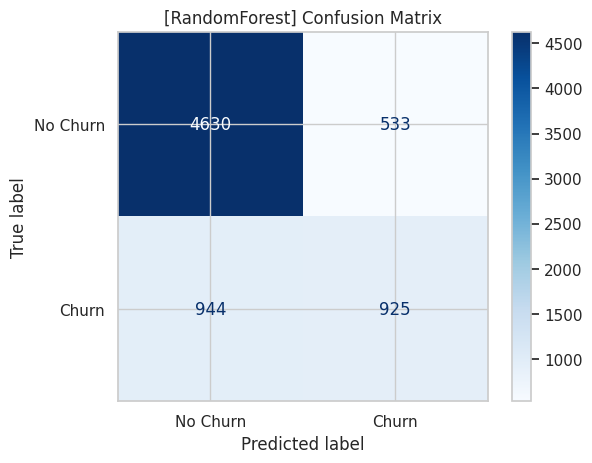

In [21]:
accuracies['rf'] = []
f1s['rf'] = []
precisions['rf'] = []
recalls['rf'] = []
cm['rf'] = np.array([[0, 0], [0, 0]])

# Loop through each fold
for train_idx, test_idx in skf.split(X, y):
  X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

  # Random Forest
  rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
  rf_model.fit(X_train, y_train)

  # Predictions
  y_pred = rf_model.predict(X_val)

  # Metrics
  accuracies['rf'].append(accuracy_score(y_val, y_pred))
  f1s['rf'].append(f1_score(y_val, y_pred))
  precisions['rf'].append(precision_score(y_val, y_pred))
  recalls['rf'].append(recall_score(y_val, y_pred))
  cm['rf'] += confusion_matrix(y_val, y_pred)

# Show average results
print(f"[RandomForest] Average Accuracy: {np.mean(accuracies['rf']):.4f}")
print(f"[RandomForest] Average Precision: {np.mean(precisions['rf']):.4f}")
print(f"[RandomForest] Average Recall: {np.mean(recalls['rf']):.4f}")
print(f"[RandomForest] Average F1 Score: {np.mean(f1s['rf']):.4f}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm['rf'], display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title(f"[RandomForest] Confusion Matrix")
plt.show()

Accuracy: 79%<br>
Precision: 63.50%<br>
Recall: 49.49%<br>
F1 Score: 55.60%<br>

From the above, although the accuracy seems to be reasonable,

We now apply Hyperparameter Optimization using Random Search CV on the dataset and Random Forest to identify the optimal set of parameters for the algorithm.

In [33]:
# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Base model
rf_base = RandomForestClassifier(random_state=42)

# Random search
rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit
rf_random.fit(X, y)

# Best parameters
print("Best Parameters for Random Forest:")
print(rf_random.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters for Random Forest:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


[RandomForest] Average Accuracy: 0.7979
[RandomForest] Average Precision: 0.6525
[RandomForest] Average Recall: 0.5136
[RandomForest] Average F1 Score: 0.5747


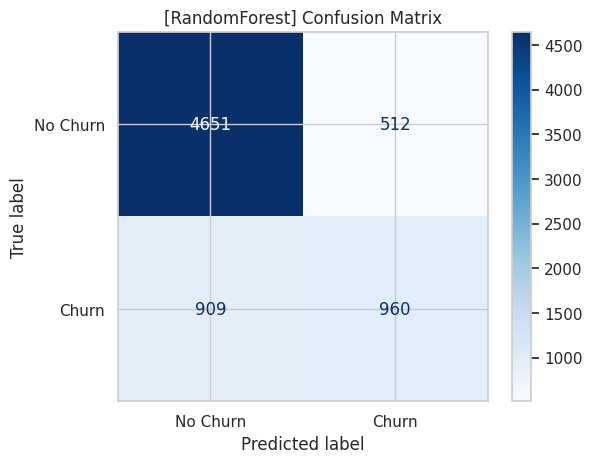

In [34]:
accuracies['rf'] = []
f1s['rf'] = []
precisions['rf'] = []
recalls['rf'] = []
cm['rf'] = np.array([[0, 0], [0, 0]])

# Use best RF params from RandomizedSearchCV
best_rf = rf_random.best_estimator_

for train_idx, test_idx in skf.split(X, y):
  X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

  model = best_rf
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)

  accuracies['rf'].append(accuracy_score(y_val, y_pred))
  precisions['rf'].append(precision_score(y_val, y_pred))
  recalls['rf'].append(recall_score(y_val, y_pred))
  f1s['rf'].append(f1_score(y_val, y_pred))
  cm['rf'] += confusion_matrix(y_val, y_pred)

# Show average results
print(f"[RandomForest] Average Accuracy: {np.mean(accuracies['rf']):.4f}")
print(f"[RandomForest] Average Precision: {np.mean(precisions['rf']):.4f}")
print(f"[RandomForest] Average Recall: {np.mean(recalls['rf']):.4f}")
print(f"[RandomForest] Average F1 Score: {np.mean(f1s['rf']):.4f}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm['rf'], display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title(f"[RandomForest] Confusion Matrix")
plt.show()

With Hyperparameter Optimization applied, the following are what the results look like:

Accuracy: 79.79%<br>
Precision: 65.25%<br>
Recall: 51.36%<br>
F1 Score: 57.47%<br>

#### Support Vector Classifier

[SupportVectorClassifier] Average Accuracy: 0.8005
[SupportVectorClassifier] Average Precision: 0.6705
[SupportVectorClassifier] Average Recall: 0.4906
[SupportVectorClassifier] Average F1 Score: 0.5666


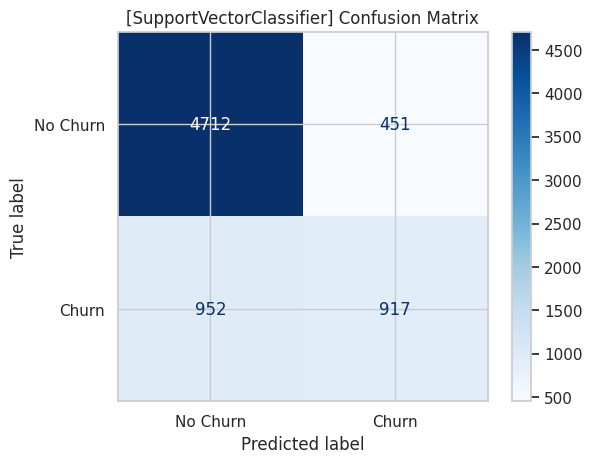

In [29]:
accuracies['svc'] = []
f1s['svc'] = []
precisions['svc'] = []
recalls['svc'] = []
cm['svc'] = np.array([[0, 0], [0, 0]])

# Stratified K-Fold
for train_idx, test_idx in skf.split(X, y):
  X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

  # SVC Model (default is RBF kernel)
  svc = SVC(probability=True, random_state=42)
  svc.fit(X_train, y_train)

  y_pred = svc.predict(X_val)

  # Metrics
  accuracies['svc'].append(accuracy_score(y_val, y_pred))
  f1s['svc'].append(f1_score(y_val, y_pred))
  precisions['svc'].append(precision_score(y_val, y_pred))
  recalls['svc'].append(recall_score(y_val, y_pred))
  cm['svc'] += confusion_matrix(y_val, y_pred)

# Show average results
print(f"[SupportVectorClassifier] Average Accuracy: {np.mean(accuracies['svc']):.4f}")
print(f"[SupportVectorClassifier] Average Precision: {np.mean(precisions['svc']):.4f}")
print(f"[SupportVectorClassifier] Average Recall: {np.mean(recalls['svc']):.4f}")
print(f"[SupportVectorClassifier] Average F1 Score: {np.mean(f1s['svc']):.4f}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm['svc'], display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title(f"[SupportVectorClassifier] Confusion Matrix")
plt.show()

Accuracy: 80.05%<br>
Precision: 67.05%<br>
Recall: 49.06%<br>
F1 Score: 56.66%<br>

We now apply Hyperparameter Optimization on SVC to identify the optimal set of parameters that could yield in better results than the above baseline model.

In [20]:
svc_param_dist = {
    'C': [0.1, 1, 10, 50, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc_base = SVC(probability=True, random_state=42)

svc_random = RandomizedSearchCV(
    estimator=svc_base,
    param_distributions=svc_param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

svc_random.fit(X, y)
best_svc = svc_random.best_estimator_

# Best parameters
print("Best Parameters for Support Vector Classifier:")
print(svc_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Support Vector Classifier:
{'kernel': 'sigmoid', 'gamma': 'auto', 'C': 1}


[SupportVectorClassifier] Average Accuracy: 0.7934
[SupportVectorClassifier] Average Precision: 0.6228
[SupportVectorClassifier] Average Recall: 0.5650
[SupportVectorClassifier] Average F1 Score: 0.5924


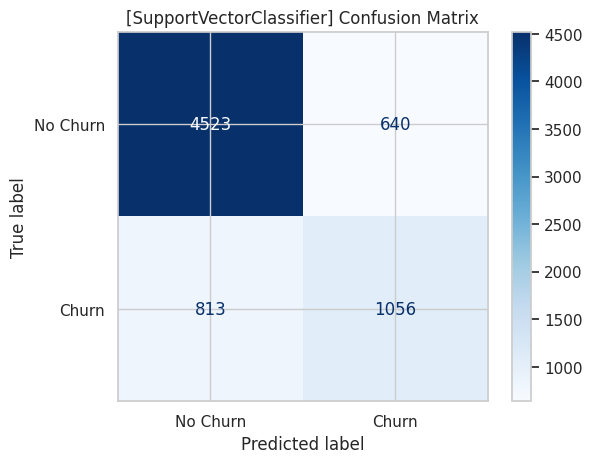

In [36]:
accuracies['svc'] = []
f1s['svc'] = []
precisions['svc'] = []
recalls['svc'] = []
cm['svc'] = np.array([[0, 0], [0, 0]])

for train_idx, test_idx in skf.split(X, y):
  X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

  model = best_svc
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)

  accuracies['svc'].append(accuracy_score(y_val, y_pred))
  precisions['svc'].append(precision_score(y_val, y_pred))
  recalls['svc'].append(recall_score(y_val, y_pred))
  f1s['svc'].append(f1_score(y_val, y_pred))
  cm['svc'] += confusion_matrix(y_val, y_pred)

# Show average results
print(f"[SupportVectorClassifier] Average Accuracy: {np.mean(accuracies['svc']):.4f}")
print(f"[SupportVectorClassifier] Average Precision: {np.mean(precisions['svc']):.4f}")
print(f"[SupportVectorClassifier] Average Recall: {np.mean(recalls['svc']):.4f}")
print(f"[SupportVectorClassifier] Average F1 Score: {np.mean(f1s['svc']):.4f}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm['svc'], display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title(f"[SupportVectorClassifier] Confusion Matrix")
plt.show()

With Hyperparameter Optimization applied, the following are what the results look like:<br>
* Accuracy: 79.34%
* Precision: 62.28%
* Recall: 56.5%
* F1-Score: 59.24%

#### Extreme Gradient Boosting

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[XGBoost] Average Accuracy: 0.7897
[XGBoost] Average Precision: 0.6236
[XGBoost] Average Recall: 0.5281
[XGBoost] Average F1 Score: 0.5716


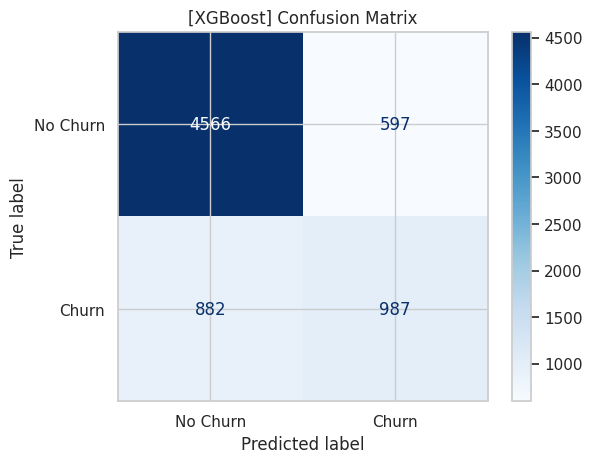

In [30]:
accuracies['xgb'] = []
f1s['xgb'] = []
precisions['xgb'] = []
recalls['xgb'] = []
cm['xgb'] = np.array([[0, 0], [0, 0]])

for train_idx, test_idx in skf.split(X, y):
  X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

  # XGBoost model
  xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
  xgb.fit(X_train, y_train)

  y_pred = xgb.predict(X_val)

  # Metrics
  accuracies['xgb'].append(accuracy_score(y_val, y_pred))
  f1s['xgb'].append(f1_score(y_val, y_pred))
  precisions['xgb'].append(precision_score(y_val, y_pred))
  recalls['xgb'].append(recall_score(y_val, y_pred))
  cm['xgb'] += confusion_matrix(y_val, y_pred)

# Show average results
print(f"[XGBoost] Average Accuracy: {np.mean(accuracies['xgb']):.4f}")
print(f"[XGBoost] Average Precision: {np.mean(precisions['xgb']):.4f}")
print(f"[XGBoost] Average Recall: {np.mean(recalls['xgb']):.4f}")
print(f"[XGBoost] Average F1 Score: {np.mean(f1s['xgb']):.4f}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm['xgb'], display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title(f"[XGBoost] Confusion Matrix")
plt.show()

Accuracy: 78.97%<br>
Precision: 62.36%<br>
Recall: 52.81%<br>
F1 Score: 57.16%<br>

We now apply Hyperparameter tuning using Random Search CV on XGBoost to identify the optimal set of hyperparameters that may yield better results compared to the baseline mdoel. This is not guaranteed but is one important approach to experiment with to identify if it yields better results.

In [22]:
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_random = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_dist,
    n_iter=30,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X, y)
best_xgb = xgb_random.best_estimator_

# Best parameters
print("Best Parameters for XGBoost:")
print(xgb_random.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for XGBoost:
{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:34:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[XGBoost] Average Accuracy: 0.8046
[XGBoost] Average Precision: 0.6646
[XGBoost] Average Recall: 0.5350
[XGBoost] Average F1 Score: 0.5928


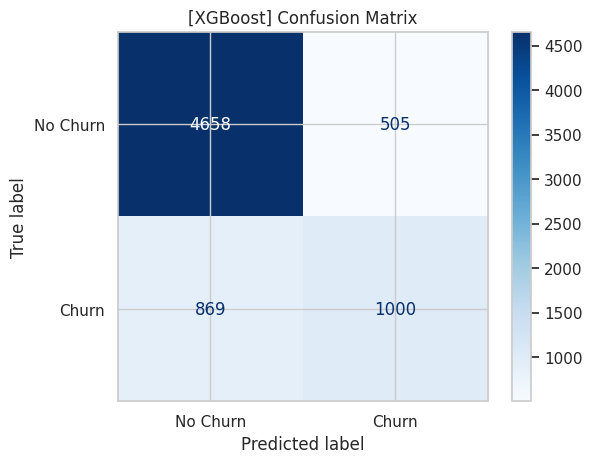

In [38]:
accuracies['xgb'] = []
f1s['xgb'] = []
precisions['xgb'] = []
recalls['xgb'] = []
cm['xgb'] = np.array([[0, 0], [0, 0]])

for train_idx, test_idx in skf.split(X, y):
  X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

  model = best_xgb
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)

  accuracies['xgb'].append(accuracy_score(y_val, y_pred))
  precisions['xgb'].append(precision_score(y_val, y_pred))
  recalls['xgb'].append(recall_score(y_val, y_pred))
  f1s['xgb'].append(f1_score(y_val, y_pred))
  cm['xgb'] += confusion_matrix(y_val, y_pred)

# Show average results
print(f"[XGBoost] Average Accuracy: {np.mean(accuracies['xgb']):.4f}")
print(f"[XGBoost] Average Precision: {np.mean(precisions['xgb']):.4f}")
print(f"[XGBoost] Average Recall: {np.mean(recalls['xgb']):.4f}")
print(f"[XGBoost] Average F1 Score: {np.mean(f1s['xgb']):.4f}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm['xgb'], display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title(f"[XGBoost] Confusion Matrix")
plt.show()

With Hyperparameter Optimization applied, the following are what the results look like:<br>
* Accuracy: 80.46%
* Precision: 66.46%
* Recall: 53.5%
* F1-Score: 59.28%

### Conclusion
When comparing the results of the models with and without Hyperparameter Tuning, all of the models saw improvements in F1-Score (which is important when there is a class imbalance) when hyperparameter tuning was applied. This is because F1-Score brings about a balance between Precision and Recall. This ensures that the model is capable of predicting both Churn and No Churn.<br>
XGBoost is shown to perform better than the two models - Random Frest and SVC (but marginally). It is shown to perform better in terms of the F1-Score.<br>
But Support Vector Classifier is shown to capture churned customers properly (better coverage of actual churn cases).<br><br>
**Best Model**<br>
The best model needs to be picked based on the business case. In this case although we want to identify all the cases of Churn but a balance between Churn and No Churn is important. The following are the best models for the different use cases:
* Support Vector Classifier: High Recall allowing to capture all the churned customers properly.
* Extreme Gradient Boosting: A balance between Precision and Recall. Therefore, capable of predicting Churn properly (but slightly less accurate than SVC) but also good at predicting Non-Churn customers.
<br><br>
